In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import zipfile
import requests
from io import BytesIO

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content), 'r') as zip_ref:
    zip_ref.extractall()

# Load the dataset
bank_df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=';')
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
# Display basic information about the dataset
print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Display the first few rows of the dataset
print(bank_df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [8]:
# Data preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
bank_df['job'] = label_encoder.fit_transform(bank_df['job'])
bank_df['marital'] = label_encoder.fit_transform(bank_df['marital'])
bank_df['education'] = label_encoder.fit_transform(bank_df['education'])
bank_df['default'] = label_encoder.fit_transform(bank_df['default'])
bank_df['housing'] = label_encoder.fit_transform(bank_df['housing'])
bank_df['loan'] = label_encoder.fit_transform(bank_df['loan'])
bank_df['contact'] = label_encoder.fit_transform(bank_df['contact'])
bank_df['month'] = label_encoder.fit_transform(bank_df['month'])
bank_df['day_of_week'] = label_encoder.fit_transform(bank_df['day_of_week'])
bank_df['poutcome'] = label_encoder.fit_transform(bank_df['poutcome'])
bank_df['y'] = label_encoder.fit_transform(bank_df['y'])


In [9]:
# Split the data into features and target variable
X = bank_df.drop(columns=['y'])
X
y = bank_df['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Build the decision tree classifier
clf = DecisionTreeClassifier(random_state=42,max_depth=5, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [16]:


# Make predictions
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [17]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9149065307113377

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.54      0.59       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238


Confusion Matrix:
 [[7035  268]
 [ 433  502]]


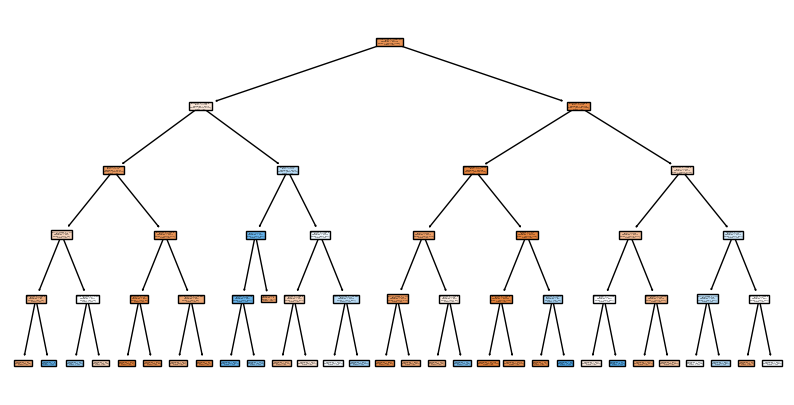

In [18]:
# Visualize the decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [14]:
# prompt: code to reduce branches in desion tree

import matplotlib.pyplot as plt
# Build the decision tree classifier with reduced branches
clf_pruned = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=5)  # Adjust max_depth and min_samples_leaf as needed
clf_pruned.fit(X_train, y_train)

# Make predictions with the pruned tree
y_pred_pruned = clf_pruned.predict(X_test)

# Evaluate the pruned model
print("Accuracy (Pruned):", accuracy_score(y_test, y_pred_pruned))
print("\nClassification Report (Pruned):\n", classification_report(y_test, y_pred_pruned))
print("\nConfusion Matrix (Pruned):\n", confusion_matrix(y_test, y_pred_pruned))

# Visualize the pruned decision tree
plt.figure(figsize=(10, 5))
plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()
